In [3]:
#packages i will be using
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os 


In [5]:
#set object of both datasets
earlyYears = pd.read_csv('./Datasets/motor_data11-14lats.csv')
laterYears = pd.read_csv('./Datasets/motor_data14-2018.csv')

In [6]:
display(earlyYears)
display(laterYears)

,SEX,INSR_BEGIN,INSR_END,EFFECTIVE_YR,INSR_TYPE,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,USAGE,CLAIM_PAID
0,0,08-AUG-13,07-AUG-14,08,1202,519755.22,7209.140,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
1,0,08-AUG-12,07-AUG-13,08,1202,519755.22,7203.890,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
2,0,08-AUG-11,07-AUG-12,08,1202,519755.22,7045.804,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
3,0,08-JUL-11,07-AUG-11,08,1202,519755.22,287.250,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
4,0,08-AUG-13,07-AUG-14,08,1202,285451.24,4286.900,5000029901,2010.0,4.0,7.0,Pick-up,2494.0,TOYOTA,Own Goods,19894.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293532,2,11-AUG-12,10-AUG-13,88,1201,0.00,577.700,5000047311,1985.0,4.0,NaN,Automobile,1295.0,TOYOTA,Private,NaN
293533,2,11-AUG-11,10-AUG-12,88,1201,0.00,695.318,5000047311,1985.0,4.0,NaN,Automobile,1295.0,TOYOTA,Private,NaN
293534,2,01-JUN-13,31-MAY-14,13,1201,250000.00,4778.450,5000949222,1993.0,4.0,NaN,Automobile,1295.0,TOYOTA,Private,NaN
293535,0,08-JUL-12,07-JUL-13,85,1202,0.00,1057.427,5000049231,2017.0,2.0,0.0,Truck,4570.0,ISUZU,General Cartage,NaN


,SEX,INSR_BEGIN,INSR_END,EFFECTIVE_YR,INSR_TYPE,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,USAGE,CLAIM_PAID
0,0,08-AUG-17,07-AUG-18,08,1202,519755.22,5097.83,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
1,0,08-AUG-16,07-AUG-17,08,1202,519755.22,6556.52,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
2,0,08-AUG-15,07-AUG-16,08,1202,519755.22,6556.52,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
3,0,08-AUG-14,07-AUG-15,08,1202,519755.22,5102.83,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
4,0,08-AUG-17,07-AUG-18,08,1202,1400000.00,13304.87,5000029901,2010.0,4.0,7.0,Pick-up,2494.0,TOYOTA,Own Goods,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508494,0,02-FEB-18,01-FEB-19,12,1202,0.00,294.51,5001350484,2018.0,4.0,7.0,Pick-up,2400.0,TOYOTA,Own Goods,NaN
508495,0,02-FEB-18,01-FEB-19,12,1202,0.00,299.51,5001350489,2018.0,4.0,7.0,Pick-up,2400.0,TOYOTA,Own Goods,NaN
508496,0,02-FEB-18,01-FEB-19,12,1202,0.00,294.51,5001350498,2018.0,4.0,7.0,Pick-up,2400.0,TOYOTA,Own Goods,NaN
508497,0,02-FEB-18,01-FEB-19,12,1202,0.00,294.51,5001350502,2018.0,4.0,7.0,Pick-up,2400.0,TOYOTA,Own Goods,NaN


In [7]:
#can delete later
earlyYears['SEATS_NUM'].unique()
earlyYears[earlyYears['SEATS_NUM']== 120]

,SEX,INSR_BEGIN,INSR_END,EFFECTIVE_YR,INSR_TYPE,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,USAGE,CLAIM_PAID
28802,0,08-JUL-11,07-JUL-12,95,1202,0.0,8956.142,5000038253,2001.0,120.0,120.0,Bus,0.0,DAF,Fare Paying Passengers,305.75
125488,1,02-OCT-11,01-OCT-12,11,1202,600000.0,6809.730,5000172372,2002.0,120.0,10.0,Pick-up,2400.0,TOYOTA,Own Goods,NaN


In [8]:
# combine both datasets to clean and then later split into test and validation sets once cleaned
combined = pd.concat([earlyYears, laterYears], join = 'outer')

In [9]:
#check if any null values
combined.isna().any()
#here we see that 8 columns have null values lets keep that in mind and go down the list understand each value in each column

SEX                  False
INSR_BEGIN           False
INSR_END             False
EFFECTIVE_YR          True
INSR_TYPE            False
INSURED_VALUE        False
PREMIUM               True
OBJECT_ID            False
PROD_YEAR             True
SEATS_NUM             True
CARRYING_CAPACITY     True
TYPE_VEHICLE         False
CCM_TON               True
MAKE                  True
USAGE                False
CLAIM_PAID            True
dtype: bool

In [10]:
#check the allowed values in this column to see if anything stands out
combined['SEX'].unique()
s = []
for i in combined['SEX']:
    if i not in s:
        s.append(i)
        
print(s)
print(combined['SEX'].value_counts())

#so it seems that there are 3 different values for sex unfortunately there is no metadata to understand this but maybe the data
#could gives us a good assumption. for rn we will assume 0 = male 1 = female and 2 = other or unkown

#correction after recieving


[0, 1, 2]
SEX
0    415297
1    318650
2     68089
Name: count, dtype: int64


In [11]:
combined

,SEX,INSR_BEGIN,INSR_END,EFFECTIVE_YR,INSR_TYPE,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,USAGE,CLAIM_PAID
0,0,08-AUG-13,07-AUG-14,08,1202,519755.22,7209.140,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
1,0,08-AUG-12,07-AUG-13,08,1202,519755.22,7203.890,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
2,0,08-AUG-11,07-AUG-12,08,1202,519755.22,7045.804,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
3,0,08-JUL-11,07-AUG-11,08,1202,519755.22,287.250,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
4,0,08-AUG-13,07-AUG-14,08,1202,285451.24,4286.900,5000029901,2010.0,4.0,7.0,Pick-up,2494.0,TOYOTA,Own Goods,19894.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508494,0,02-FEB-18,01-FEB-19,12,1202,0.00,294.510,5001350484,2018.0,4.0,7.0,Pick-up,2400.0,TOYOTA,Own Goods,NaN
508495,0,02-FEB-18,01-FEB-19,12,1202,0.00,299.510,5001350489,2018.0,4.0,7.0,Pick-up,2400.0,TOYOTA,Own Goods,NaN
508496,0,02-FEB-18,01-FEB-19,12,1202,0.00,294.510,5001350498,2018.0,4.0,7.0,Pick-up,2400.0,TOYOTA,Own Goods,NaN
508497,0,02-FEB-18,01-FEB-19,12,1202,0.00,294.510,5001350502,2018.0,4.0,7.0,Pick-up,2400.0,TOYOTA,Own Goods,NaN


In [12]:
#look for the possible values of these columns
display(combined['INSR_TYPE'].unique())
display(combined['EFFECTIVE_YR'].unique())
print(combined['INSR_TYPE'].value_counts())
#it would seem that because of the wide variance of values in effective year and no metadata to help we might have to drop this
#this column

#insurance type is still up in the air on whether or not it should be used because of lack of metadata

array([1202, 1201, 1204], dtype=int64)

array(['08', '11', '01', '12', '13', '07', '61', '06', '14', '74', '10',
       '09', '97', '89', '72', '63', '95', '79', '91', '80', '26', '73',
       '05', '96', '94', '5/', '92', '99', '84', '75', '00', '18', '03',
       '28', '87', '02', '85', '59', '82', '76', '04', '86', '27', '45',
       '32', '57', '-1', '46', '55', '37', '65', '50', '34', '67', '81',
       '19', '15', '30', '56', '77', '47', '38', '31', '16', '33', '93',
       '24', '98', '78', '88', '90', '54', '35', '20', '48', '44', '42',
       '52', '41', '6-', '40', '49', '39', '5B', '53', '3B', '60', '71',
       '70', '2B', '58', '25', '23', '43', '22', '-7', '51', '66', '7B',
       '68', '21', '1B', '36', '62', '17', '64', '-B', '/B', '83', '69',
       '29', '/2', '6A', '8B', 'EN', '-2', '-6', '-8', '4A', '0-', '-9',
       '1A', '8R', '-3', 'SR', '1-', '0B', '9B', 'MO', nan, '1S', 'BS',
       '1R', 'RS', 'SS', '1K', '1M', '6B', '7-', 'IN', '2A', '/1', '0A',
       '/A', '4B', '1C', '/0', '5A', 'EA', '3A', '5C

INSR_TYPE
1202    594204
1201    207497
1204       335
Name: count, dtype: int64


In [ ]:
combined.columns

In [ ]:
#change these values for easy plot 
combined['INSR_TYPE'] = combined['INSR_TYPE'].replace({1201: 'Private' , 1202: 'Commercial', 1204:'Motor trade road risk'})

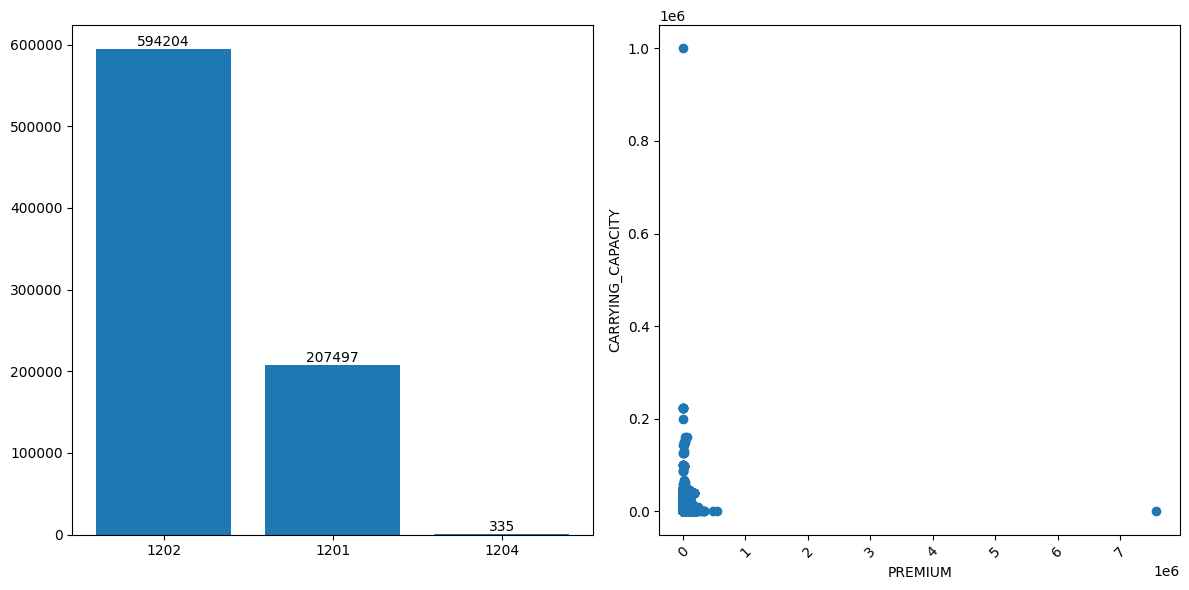

In [13]:
import matplotlib.pyplot as plt

# Create a figure and an array of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Get the value counts from the 'INSR_TYPE' column
insr_type_counts = combined['INSR_TYPE'].value_counts()

# Extract the values and counts
values = insr_type_counts.index
counts = insr_type_counts.values

# Manually set x-axis positions for the specific values
x_positions = [1, 2, 3]  # Adjust the positions as needed

bar_width = 0.8  # Adjust the width of the bars
bar1 = axs[0].bar(x_positions, counts, width=bar_width, align='center')

#second plot look at the correlation between premium and capacity
scat1 = axs[1].scatter(combined['PREMIUM'], combined['CARRYING_CAPACITY'])

# Annotate each bar with its count value
for bar, count in zip(bar1, counts):
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2, yval, round(count, 2), ha='center', va='bottom')

# Set x-axis ticks and labels
axs[0].set_xticks(x_positions)
axs[0].set_xticklabels(values)

# Example: Plot something on the second subplot
# right idea though axs[1].set_xticks(range(0, int(combined['PREMIUM'].max()) + 1000, 1000))
axs[1].set_xlabel('PREMIUM')
axs[1].set_ylabel('CARRYING_CAPACITY')
plt.xticks(rotation=45)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
#some boolean masking to check to see which columns have the biggest amount of null values
combined2 = combined[['SEX', 'INSR_BEGIN', 'INSR_END', 'EFFECTIVE_YR', 'INSR_TYPE',
       'INSURED_VALUE', 'PREMIUM', 'OBJECT_ID', 'PROD_YEAR', 'SEATS_NUM',
        'TYPE_VEHICLE', 'CCM_TON', 'MAKE', 'USAGE']]
combined2[combined2.isna().any(axis=1)].reset_index(drop=True)



In [ ]:
#check just to make sure no columns were in one data set and not the other
common_columns = set(earlyYears.columns) & set(laterYears.columns)

columns_only_in_early = set(earlyYears.columns) - common_columns
columns_only_in_later = set(laterYears.columns) - common_columns

print("Columns only in earlyYears:", columns_only_in_early)
print("Columns only in laterYears:", columns_only_in_later)



In [ ]:
#check the dates and there formats

date = combined['INSR_BEGIN']
#string data type may want to convert them to date format 
type(date.iloc[0])

date = date[:30]
for i in date:
    num = i[:2]
    
    print(num)
#so it would seem my assumption of the first value is day so it would also seem to be formatted day/ mo abbrev/ year

In [ ]:
#lets check to see if all insurances begin and end within a year

#first lets  
from datetime import datetime

combined['INSR_BEGIN'] = pd.to_datetime(combined['INSR_BEGIN'], format='%d-%b-%y')
combined['INSR_END'] = pd.to_datetime(combined['INSR_END'], format='%d-%b-%y')

# check to see if any dates are correct and not entry date incorrect 
combined[combined['INSR_BEGIN'] > combined['INSR_END']]

combined['INSR_BEGIN'] - combined['INSR_END']

In [ ]:
combined[combined['INSR_END'] - combined['INSR_BEGIN'] <  pd.Timedelta(days=364)]

In [ ]:
#understand the mean of dates for the dataset
time= combined['INSR_END'] - combined['INSR_BEGIN']
time.mean()

In [ ]:
combined.head()

In [ ]:
#see the unique values for type of vehicle
combined['TYPE_VEHICLE'].unique()

In [ ]:
#change the values of type of vehicle to represent numerical values for ML purposes
combined['TYPE_VEHICLE'] = combined['TYPE_VEHICLE'].replace({'Pick-up': 1, 'Station Wagones': 2, 'Truck': 3, 'Bus': 4, 'Automobile': 5,
       'Tanker': 6, 'Trailers and semitrailers': 7, 'Motor-cycle': 8, 'Tractor': 9,
       'Special construction': 10, 'Trade plates': 11})

In [ ]:
#see the number of different make there are
count = 0
lis = []
for i in combined['MAKE']:
    if i not in lis:
        lis.append(i)
        count += 1 
print(count)

In [ ]:
combined['USAGE'].unique()

In [ ]:
#replacing nan values with 0 to use
combined['CLAIM_PAID'] = combined['CLAIM_PAID'].replace({np.nan : 0})

In [ ]:
#changing values to numeric to use in ML model
combined['USAGE'] = combined['USAGE'].replace({'Own Goods': 1 , 'Private': 2, 'General Cartage': 3, 'Fare Paying Passengers': 4,
                              'Taxi': 5, 'Car Hires': 6, 'Own service': 7, 'Agricultural Own Farm': 8,
                               'Special Construction': 9, 'Others': 10, 'Learnes': 11, 'Ambulance': 12,
                               'Agricultural Any Farm': 13, 'Fire fighting': 14})



In [ ]:
#changes the values of make to numeric for ML model
combined['MAKE'] = pd.factorize(combined['MAKE'])[0] + 1

In [ ]:
print(combined['EFFECTIVE_YR'].unique())
combined['EFFECTIVE_YR'].value_counts()

In [ ]:
#changing values using regex operators to be used in ML model
combined['EFFECTIVE_YR'] = combined['EFFECTIVE_YR'].replace(['/', '-', 'B', 'S', 'R', 'EN', 'MO', 'IN', 'SS', 'RS', 'SR', 'EA', 'BS'], '', regex=True)



In [ ]:

combined = combined.dropna(subset=['EFFECTIVE_YR'])


combined['EFFECTIVE_YR'] = pd.to_numeric(combined['EFFECTIVE_YR'], errors='coerce')
combined['EFFECTIVE_YR'].fillna(combined['EFFECTIVE_YR'].median(), inplace=True)


In [ ]:
display(combined[combined['EFFECTIVE_YR'] == 13])
combined['EFFECTIVE_YR'].isna().any()
combined['EFFECTIVE_YR'].median()

In [ ]:
combined['SEATS_NUM'].unique()

In [ ]:
combined[combined['SEATS_NUM'] == 170]

In [ ]:
#store og variables
combined2 = combined[['SEX', 'INSR_BEGIN', 'INSR_END', 'EFFECTIVE_YR', 'INSR_TYPE',
       'INSURED_VALUE', 'OBJECT_ ID', 'PROD_YEAR', 'SEATS_NUM',
        'TYPE_VEHICLE', 'CCM_TON', 'MAKE', 'USAGE']]
# variables that can currently be used
[['SEX', 'INSR_TYPE',
       'INSURED_VALUE', 'OBJECT_ID', 'PROD_YEAR', 'SEATS_NUM','CARRYING_CAPACITY',
        'TYPE_VEHICLE', 'CCM_TON', 'USAGE']]

#low inpact
'CLAIM_PAID'

In [ ]:
#some boolean masking to check to see which columns have the biggest amount of null values
combined2 = combined[['SEX', 'INSR_TYPE',
       'INSURED_VALUE', 'OBJECT_ID', 'PROD_YEAR', 'SEATS_NUM','CARRYING_CAPACITY',
        'TYPE_VEHICLE','MAKE', 'CCM_TON', 'USAGE']]
combined2

In [ ]:
combined['PREMIUM'].min(), combined['PREMIUM'].max()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

premium_data = combined["PREMIUM"]

# Calculate the IQR
Q1 = premium_data.quantile(0.25)
Q3 = premium_data.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = premium_data[(premium_data < lower_bound) | (premium_data > upper_bound)]

# Count the number of outliers
num_outliers = len(outliers)

# Plot a boxplot with outliers highlighted
plt.figure(figsize=(8, 6))
sns.boxplot(x=premium_data)
plt.scatter(outliers.index, outliers, color='red', label='Outliers')
plt.legend()
plt.title('Boxplot with Outliers Highlighted')
plt.show()

# Print the number of outliers
print(f"Number of outliers: {num_outliers}")


In [ ]:
outliers.mean(), combined['PREMIUM'].mean()

In [ ]:
import pandas as pd


selected_rows = combined[combined['INSURED_VALUE'] == 0]

# Calculate the mean of selected rows
mean_values = selected_rows.mean()

# Set the display option for float format
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Display the mean values
print(mean_values)


In [ ]:
#before changing dates 
# just to run a preliminary test on the data 
from sklearn.model_selection import train_test_split
# Selecting features for the model
X = combined2.dropna()[:603800]
y = combined['PREMIUM'].dropna()[:603374]
X_train, X_test, y_train, y_test,  = train_test_split(X, y, test_size=0.2 , random_state=42)
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)

model.predict(X_test)

model.score(X_test, y_test)

In [ ]:
#lets also now test a decision tree
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Selecting features for the model
X = combined[['SEX', 
       'INSURED_VALUE', 'OBJECT_ID', 'PROD_YEAR', 'SEATS_NUM',
        'TYPE_VEHICLE', 'MAKE','CCM_TON',  'USAGE']].dropna()[:603800]
y = combined['PREMIUM'].dropna()[:603800]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the decision tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Making predictions on the test set
tree_predictions = tree_model.predict(X_test)

# Evaluating the model using R-squared score
tree_accuracy = r2_score(y_test, tree_predictions)

# Print the R-squared score
print("Decision Tree R-squared score:", tree_accuracy)


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

X = combined[['OBJECT_ID', 'USAGE', 'PROD_YEAR', 'PREMIUM', 'CCM_TON', 'TYPE_VEHICLE']].dropna()[:603800]
y = combined['MAKE'].dropna()[:603800]

# Encode categorical variables if needed (using one-hot encoding in this example)
#X = pd.get_dummies(X, columns=['SEX', 'TYPE_VEHICLE', 'MAKE', 'USAGE'], drop_first=True)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Random Forest model
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)

# Making predictions on the test set
forest_predictions = forest_model.predict(X_test)

# Evaluating the model using R-squared score
forest_accuracy = r2_score(y_test, forest_predictions)

# Print the R-squared score
print("Random Forest R-squared score:", forest_accuracy)


In [ ]:
#before date change
[['USAGE','EFFECTIVE_YR',   'PROD_YEAR', 'SEX', 'MAKE', 'PREMIUM', 'CCM_TON', 'TYPE_VEHICLE']]

In [ ]:
#in case we want to use these two columns
from datetime import datetime
combined['INSR_BEGIN_day'] = combined['INSR_BEGIN'].dt.day
combined['INSR_BEGIN_month'] = combined['INSR_BEGIN'].dt.month
combined['INSR_BEGIN_year'] = combined['INSR_BEGIN'].dt.year

combined['INSR_END_day'] = combined['INSR_END'].dt.day
combined['INSR_END_month'] = combined['INSR_END'].dt.month
combined['INSR_END_year'] = combined['INSR_END'].dt.year



# Selecting features for the model
X = combined[['SEX', 'INSR_BEGIN_day', 'INSR_BEGIN_month', 'INSR_BEGIN_year', 'INSR_END_day', 'INSR_END_month', 'INSR_END_year', 'EFFECTIVE_YR', 'INSR_TYPE', 'PREMIUM', 'OBJECT_ID', 'PROD_YEAR', 'SEATS_NUM',
       'CARRYING_CAPACITY', 'TYPE_VEHICLE', 'CCM_TON', 'MAKE', 'USAGE',
       'CLAIM_PAID']]

In [ ]:
combined[]

In [ ]:
combined

# Will Need to get the accuracy of this up 

In [ ]:
Y = combined['PREMIUM'].dropna()

In [ ]:
weights = np.array([2,2,1,1,2,1,2,1,2])
wei = np.tile(weights, (X.shape[0], 1))

In [ ]:
# just to run a preliminary test on the data 
from sklearn.model_selection import train_test_split
# Selecting features for the model
X = combined3
y = Y[:603800]
X_train, X_test, y_train, y_test, weight_train, weight_test = train_test_split(X, y, wei, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)

model.predict(X_test)

model.score(X_test, y_test)